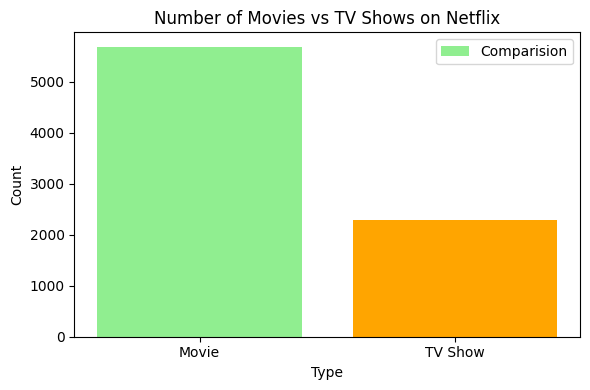

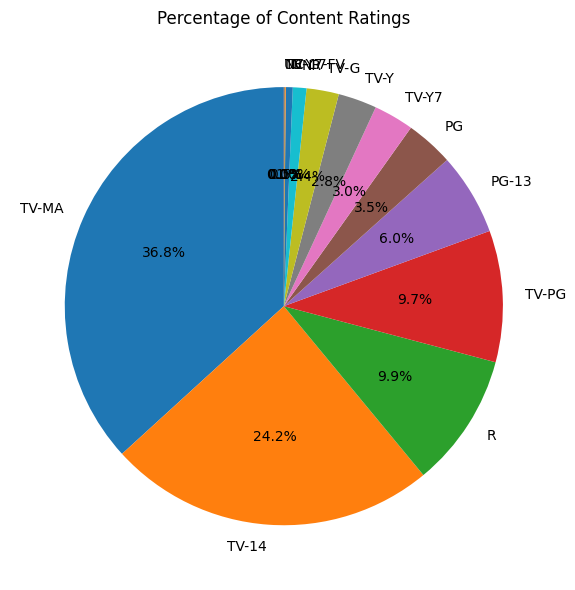

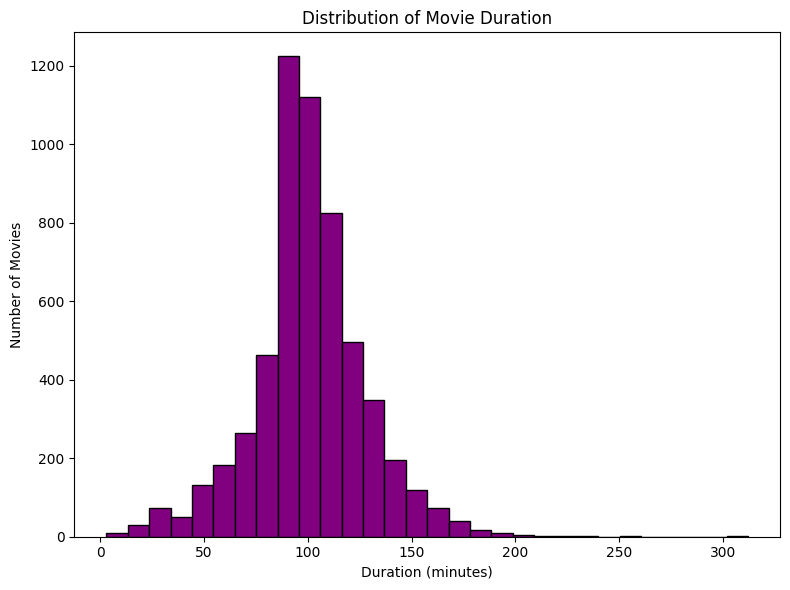

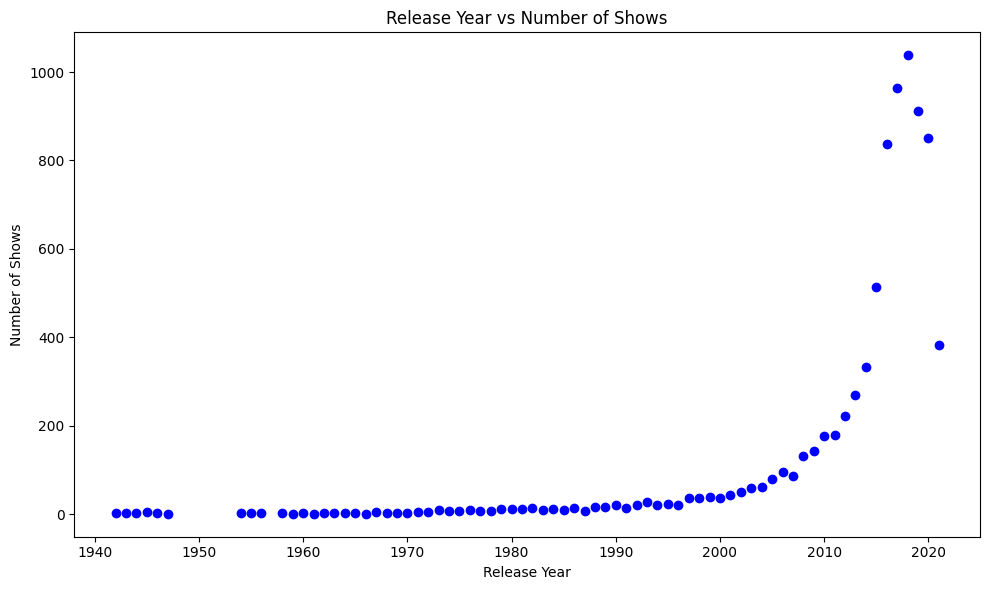

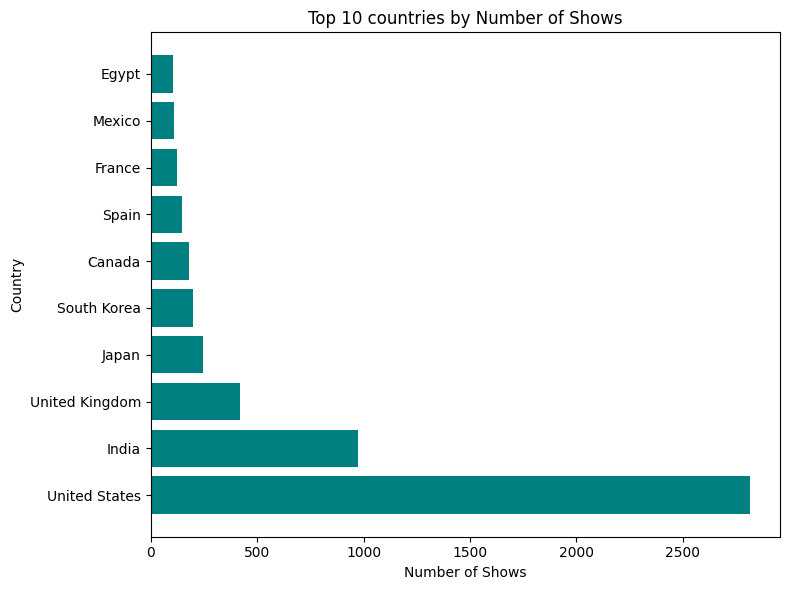

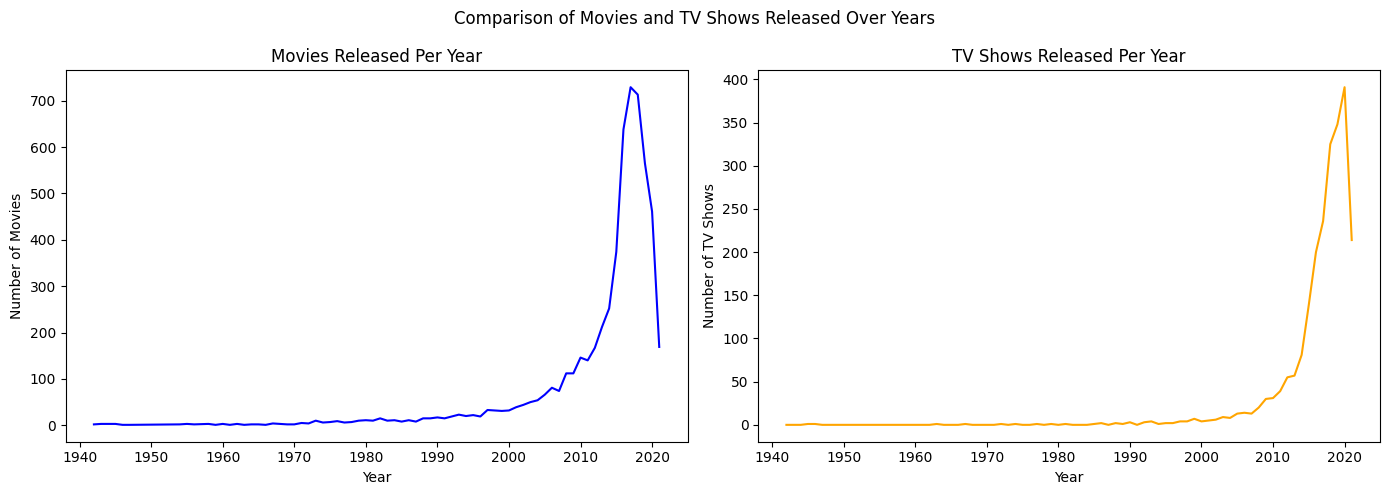

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

#movies vs tvshows comparision
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['lightgreen', 'orange'], label='Comparision')
plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()

plt.savefig('movies_vs_tvshows.png')
plt.show()


#content rating pie chart
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()

plt.savefig('content_rating_pie_chart.png')
plt.show()


#movie duration histogram
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()

plt.savefig('movie_duration_histogram.png')
plt.show()


#release year vs number of shows scatter plot
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='blue')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()

plt.savefig('release_year_scatter.png')
plt.show()


#Top 10 countries by Number of Shows
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()

plt.savefig('top10_countries.png')
plt.show()


#Comparison of Movies and TV Shows Released Over Years
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()

plt.savefig('movies_tvshows_comparison.png')
plt.show()
